In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Perrin Freres monthly champagne sales millions.csv')

In [5]:
df.head(103)

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
98,1972-03,4577.0
99,1972-04,4788.0
100,1972-05,4618.0
101,1972-06,5312.0


In [6]:
df.columns=["Month","Sales"]
df.head()


,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
df.drop(105,axis=0,inplace=True)


In [9]:
df.drop(106,axis=0,inplace=True)

In [10]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

In [12]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [13]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

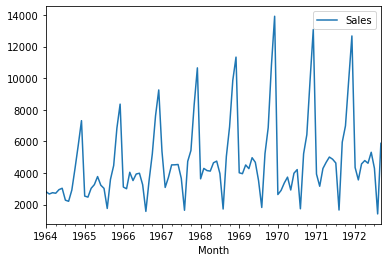

In [14]:
df.plot()

In [15]:
#Rolling Test
rolmean = df.rolling(window = 12).mean()
rolstd = df.rolling(window = 12).std()
print (rolmean, rolstd)

                  Sales
Month                  
1964-01-01          NaN
1964-02-01          NaN
1964-03-01          NaN
1964-04-01          NaN
1964-05-01          NaN
...                 ...
1972-05-01  5709.500000
1972-06-01  5746.000000
1972-07-01  5718.083333
1972-08-01  5697.583333
1972-09-01  5691.416667

[105 rows x 1 columns]                   Sales
Month                  
1964-01-01          NaN
1964-02-01          NaN
1964-03-01          NaN
1964-04-01          NaN
1964-05-01          NaN
...                 ...
1972-05-01  2943.699327
1972-06-01  2935.100773
1972-07-01  2948.213094
1972-08-01  2979.690449
1972-09-01  2979.194841

[105 rows x 1 columns]


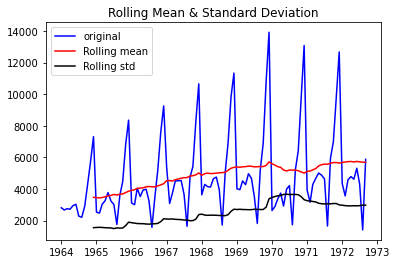

In [16]:
#plot rolling statistic
orig = plt.plot(df, color='blue', label='original')
mean = plt.plot(rolmean, color='red', label= 'Rolling mean')
std = plt.plot(rolstd, color='black', label= 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [17]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(df['Sales'])

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276228
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [22]:
df.head()

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [23]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [24]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [25]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

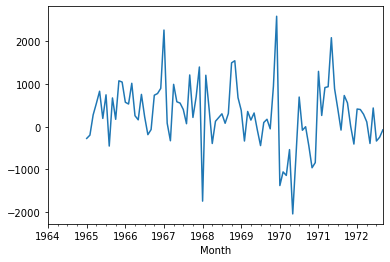

In [26]:
df['Seasonal First Difference'].plot()

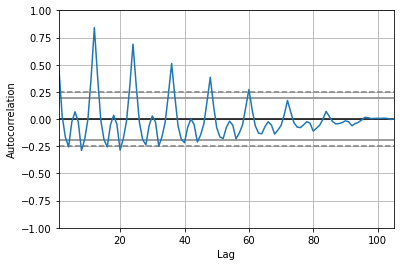

In [27]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

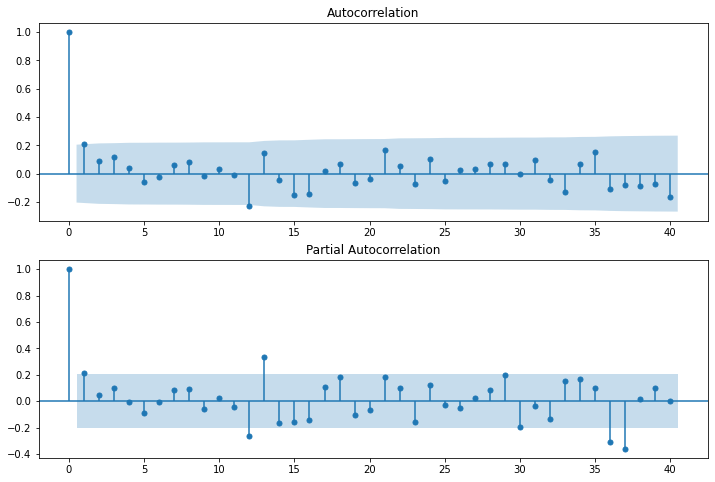

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)


In [30]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [31]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [32]:
trn= df["Sales"].iloc[:90]
test =df["Sales"].iloc[90:]

In [33]:
model=ARIMA(trn,order=(1,1,1),)
model_fit=model.fit()

C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [34]:

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   89
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -811.324
Method:                       css-mle   S.D. of innovations           2158.191
Date:                Wed, 01 Sep 2021   AIC                           1630.648
Time:                        08:47:37   BIC                           1640.603
Sample:                    02-01-1964   HQIC                          1634.661
                         - 06-01-1971                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.1960     15.300      1.843      0.065      -1.791      58.183
ar.L1.D.Sales     0.4424      0.096      4.591      0.000       0.254       0.631
ma.L1.D.Sales    -1.0000      0.029    -33.981      0.000      -1.058      -0.942
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2601           +0.0000j            2.2601            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

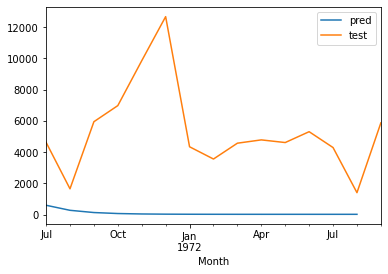

In [35]:
pred=model_fit.predict(start=90,end=103)

pred.plot(legend=True,label="pred")
test.plot(legend=True,label="test")

In [36]:
import statsmodels.api as sm

In [37]:

model=sm.tsa.statespace.SARIMAX(trn,order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


1971-07-01     4387.096840
1971-08-01     2050.483747
1971-09-01     5495.401573
1971-10-01     6725.880066
1971-11-01    10363.172009
1971-12-01    13748.036307
1972-01-01     3685.616973
1972-02-01     3266.228903
1972-03-01     4190.833132
1972-04-01     4620.090385
1972-05-01     4534.807698
1972-06-01     4833.504913
1972-07-01     4662.412421
1972-08-01     2201.891210
1972-09-01     5658.677560
1972-10-01     6868.950098
1972-11-01    10371.553614
1972-12-01    13664.161876
1973-01-01     4162.528018
1973-02-01     3528.235689
1973-03-01     4574.338278
1973-04-01     4979.670197
1973-05-01     5149.888594
1973-06-01     5183.690323
1973-07-01     4820.149456
1973-08-01     2435.135189
1973-09-01     5884.689106
1973-10-01     7107.274720
1973-11-01    10691.954494
1973-12-01    14040.781620
1974-01-01     4197.417036
Freq: MS, Name: predicted_mean, dtype: float64

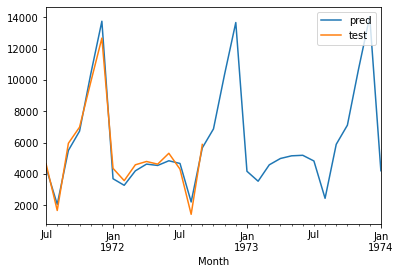

In [38]:
pred2=results.predict(start=90,end=120)

pred2.plot(legend=True,label="pred")
test.plot(legend=True,label="test")
pred2

In [39]:

from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,120 )]

In [40]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [41]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference
1982-04-01,NaN,NaN,NaN
1982-05-01,NaN,NaN,NaN
1982-06-01,NaN,NaN,NaN
1982-07-01,NaN,NaN,NaN
1982-08-01,NaN,NaN,NaN


In [42]:
future_df=pd.concat([df,future_datest_df])

C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

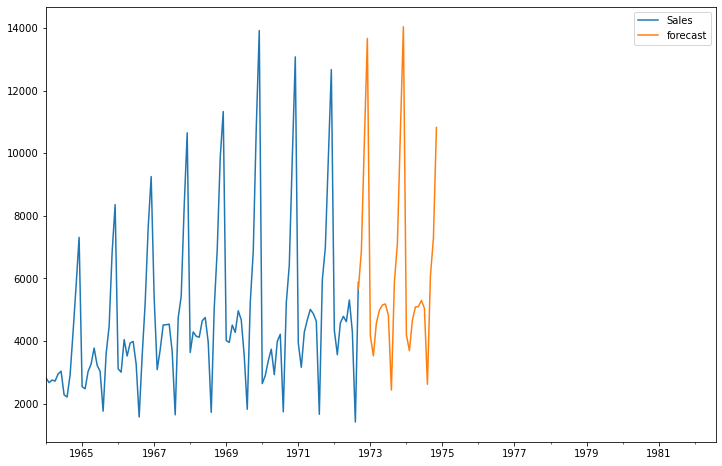

In [43]:
future_df['forecast'] = results.predict(start = 104, end = 130, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))